In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lcs import *
import networkx as nx
from scipy.stats import beta
import time
from numpy.linalg import eigh

In [2]:
A = erdos_renyi(50, 0.5)
n = np.size(A, axis=0)

tmax = 4000

In [3]:
x0 = np.zeros(n)
x0[random.randrange(n)] = 1

gamma = 1
nu = eigh(A)[0][-1]
b = 2 * gamma / nu

# simple contagion
nsamples = 50000
skip = 10

sc = lambda nu, b: 1 - (1 - b) ** nu
c = sc(np.arange(n), b)

x = contagion_process(A, gamma, c, x0, tmin=0, tmax=tmax)

p_c = np.ones((2, n))
p_rho = np.array([1, 1])

rho0 = 0
A0 = nx.adjacency_matrix(nx.fast_gnp_random_graph(n, rho0))
samples1, l = infer_adjacency_matrix(
    x, A0, p_rho, p_c, nsamples=nsamples, burn_in=0, skip=skip, return_likelihood=True
)

Acceptance ratio is 0.0374207484149683


/var/folders/18/v8kqhtv16cl5085d0dv0hj8c0000gn/T/ipykernel_23499/2743065751.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


plot 0 finished
plot 1000 finished
plot 2000 finished
plot 3000 finished
plot 4000 finished
plot 5000 finished
plot 6000 finished
plot 7000 finished
plot 8000 finished
plot 9000 finished
plot 10000 finished
plot 11000 finished
plot 12000 finished
plot 13000 finished
plot 14000 finished
plot 15000 finished
plot 16000 finished
plot 17000 finished
plot 18000 finished
plot 19000 finished
plot 20000 finished
plot 21000 finished
plot 22000 finished
plot 23000 finished
plot 24000 finished


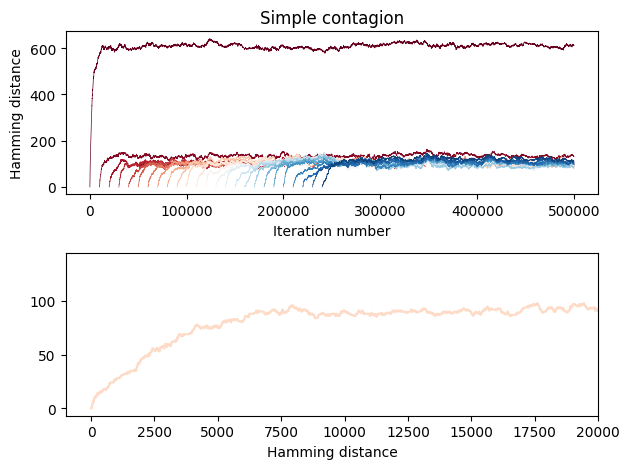

In [14]:
plt.figure()
plt.title("Simple contagion")
plt.subplot(211)
for i in range(0, int(len(samples1) / 2), 1000):
    h = []
    idx = []
    for j in range(i, len(samples1)):
        h.append(hamming_distance(samples1[i], samples1[j]))
        idx.append(j * skip)
    plt.plot(
        idx,
        h,
        label=f"Distance from iteration {i}",
        linewidth=0.5,
        color=plt.cm.RdBu((2 * i / len(samples1))),
    )
    print(f"plot {i} finished")
plt.title("Simple contagion")
plt.xlabel("Iteration number")
plt.ylabel("Hamming distance")

plt.subplot(212)
burn_in = 100000
burn_in_idx = int(burn_in / skip)
h = []
idx = []
for j in range(burn_in_idx, len(samples1)):
    h.append(hamming_distance(samples1[burn_in_idx], samples1[j]))
    idx.append((j - burn_in_idx) * skip)
plt.plot(idx, h, color=plt.cm.RdBu((2 * burn_in_idx / len(samples1))))
plt.xlim([0, 20000])
plt.xlabel("decorrelation steps")
plt.xlabel("Hamming distance")
plt.tight_layout()
# plt.savefig("Figures/simple_contagion_distances.png", dpi=1000)
# plt.savefig("Figures/simple_contagion_distances.pdf", dpi=1000)

In [25]:
# threshold contagion

tau = 2
cc = lambda nu, tau, beta: beta * (nu >= tau)
c = cc(np.arange(n), tau, b)

x = contagion_process(A, gamma, c, x0, tmin=0, tmax=tmax, random_seed=None)

p_c = np.ones((2, n))
p_rho = np.array([2, 5])

rho0 = beta(p_rho[0], p_rho[1]).rvs()

A0 = nx.adjacency_matrix(nx.fast_gnp_random_graph(n, rho0))
samples2, l = infer_adjacency_matrix(
    x, A0, p_rho, p_c, nsamples=nsamples, burn_in=0, skip=skip, return_likelihood=True
)

Acceptance ratio is 0.7116205810290515


plot 0 finished
plot 1000 finished
plot 2000 finished
plot 3000 finished
plot 4000 finished
plot 5000 finished
plot 6000 finished
plot 7000 finished
plot 8000 finished
plot 9000 finished


Text(0, 0.5, 'Hamming distance')

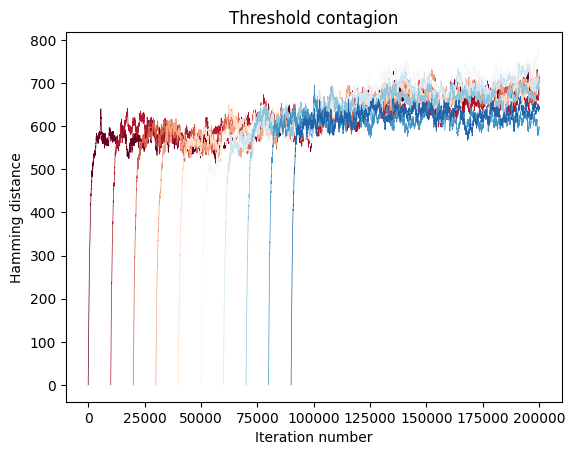

In [48]:
plt.figure()
for i in range(0, int(len(samples2) / 2), 1000):
    h = []
    idx = []
    for j in range(i, len(samples2)):
        h.append(hamming_distance(samples2[i], samples2[j]))
        idx.append(j * skip)
    plt.plot(
        idx,
        h,
        label=f"Distance from iteration {i}",
        linewidth=0.5,
        color=plt.cm.RdBu((2 * i / len(samples2))),
    )
    print(f"plot {i} finished")
plt.title("Threshold contagion")
plt.xlabel("Iteration number")
plt.ylabel("Hamming distance")
# plt.savefig("Figures/threshold_contagion_distances.png", dpi=1000)
# plt.savefig("Figures/threshold_contagion_distances.pdf", dpi=1000)